# Probability Assignment

To get full credit in this assignment you need to use `numpy`, `scipy` and `pandas` libraries. Sometimes you need to type equations - type equations in Latex math notation. To produce the plots you can use any plotting library you need.

PS1: We run the assignment through chatGPT the questions and you will be referred to the Dean if we find that a robot answered your questions.

PS2: We are also monitoring solution websites and we will take action against anyone that uploads this to a solution website.

## Problem 1 (80 points)

A surgeon analyzes surgical videos and models events that occur. He describes the problem statement in [here](https://thomasward.com/simulating-correlated-data/). Your job is to replicate the solution in Python and demonstrate your understanding of the steps performed by  including adequate explanation of the code in either markdown cells or inline to the code.  You can insert as many markdown or code cells you need to perform the analysis. 


## Question 1a (10 points)

Write the code for generating the `gs` variable. This is the simplest random variable of the problem and can be generated independent of the others. 

In [22]:
import numpy as np

num_samples = 10000
np.random.seed(1234)

# Parameters for the 'gs' variable
mean_gs = 7.25
std_dev_gs = 0.875

# Generate the 'gs' variable
gs = np.random.normal(mean_gs, std_dev_gs, num_samples)

# Show the first 10 values of 'gs'
print(gs[:10])

[7.66250577 6.20789627 8.5036186  6.97642959 6.61948486 8.02626757
 8.00213986 6.69304193 7.26373433 5.28765067]


## Question 1b (20 points)

We have three variables, `ak`, `pp`, and `ptime`. Write the code for generating these variables from Multivate Gaussian distribution and replicate the associated plots. 



Use numpy library to sample from a multivariate normal distribution with a mean of 0 for each variable and the covariance matrix Σ we just defined. 

And confirm that the variables are correlated as described in the text.

In [23]:
# Define the covariance matrix (Σ Sigma)
sig = np.array([[1.0, 0.6, -0.9],
                  [0.6, 1.0, -0.5],
                  [-0.9, -0.5, 1.0]])

means = [0, 0, 0]  # Mean of 0 for each variable

APT = np.random.multivariate_normal(means, sig, num_samples)

cor_APT = np.corrcoef(APT, rowvar=False)
print(cor_APT)



[[ 1.          0.60126969 -0.90116509]
 [ 0.60126969  1.         -0.50640219]
 [-0.90116509 -0.50640219  1.        ]]


Visualize the relationship between the variables using scatter plots.

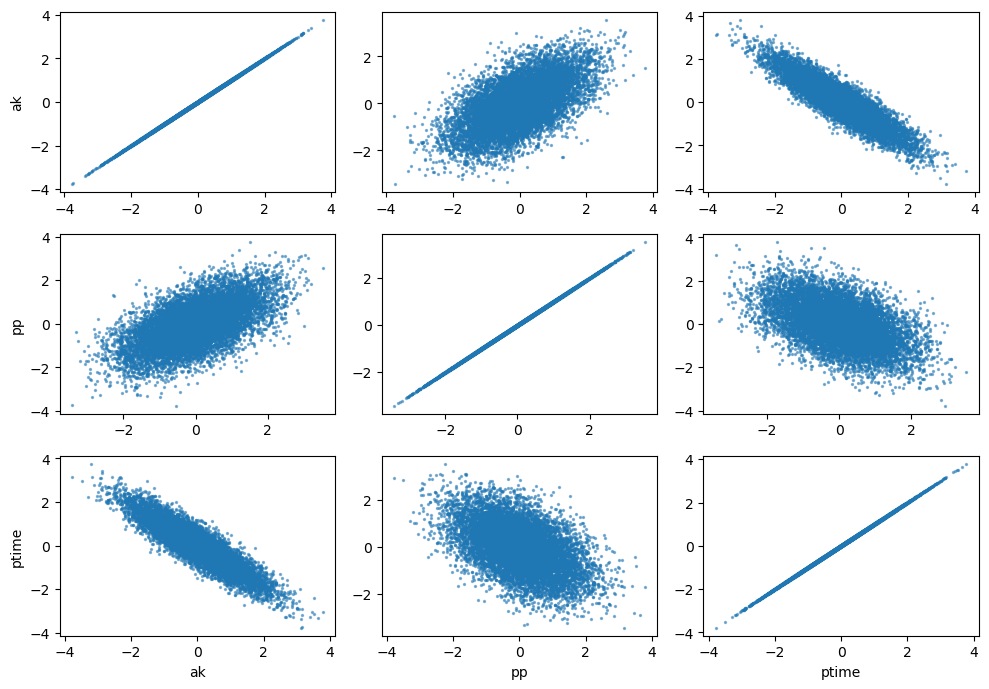

In [24]:
import matplotlib.pyplot as plt

labels = ["ak", "pp", "ptime"]

# Use scatter plots to visualize relationships
plt.figure(figsize=(10, 7))

for i, label1 in enumerate(labels):
    for j, label2 in enumerate(labels):
        plt.subplot(3, 3, i * 3 + j + 1)
        plt.scatter(APT[:, i], APT[:, j], alpha=0.5, s=2)
        if j == 0:
            plt.ylabel(label1)
        if i == 2:
            plt.xlabel(label2)
            
plt.tight_layout()
plt.show()

## Question 1c (20 points)

Perform the probability inrtegral transform and replicate the associated plots.

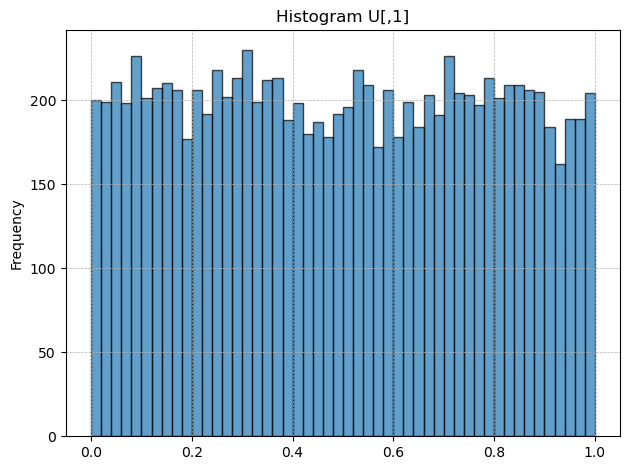

In [25]:
from scipy.stats import norm

# Apply the CDF of the normal distribution to transform the variables
U_ak = norm.cdf(APT[:, 0])
U_pp = norm.cdf(APT[:, 1])
U_ptime = norm.cdf(APT[:, 2])

# Visualize the transformed 'ak' variable (U[, 1])
plt.hist(U_ak, bins=50, edgecolor='k', alpha=0.7)
plt.title('Histogram U[,1]')
plt.ylabel('Frequency')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


## Question 1d (20 points)

Perform the inverse transform sampling.

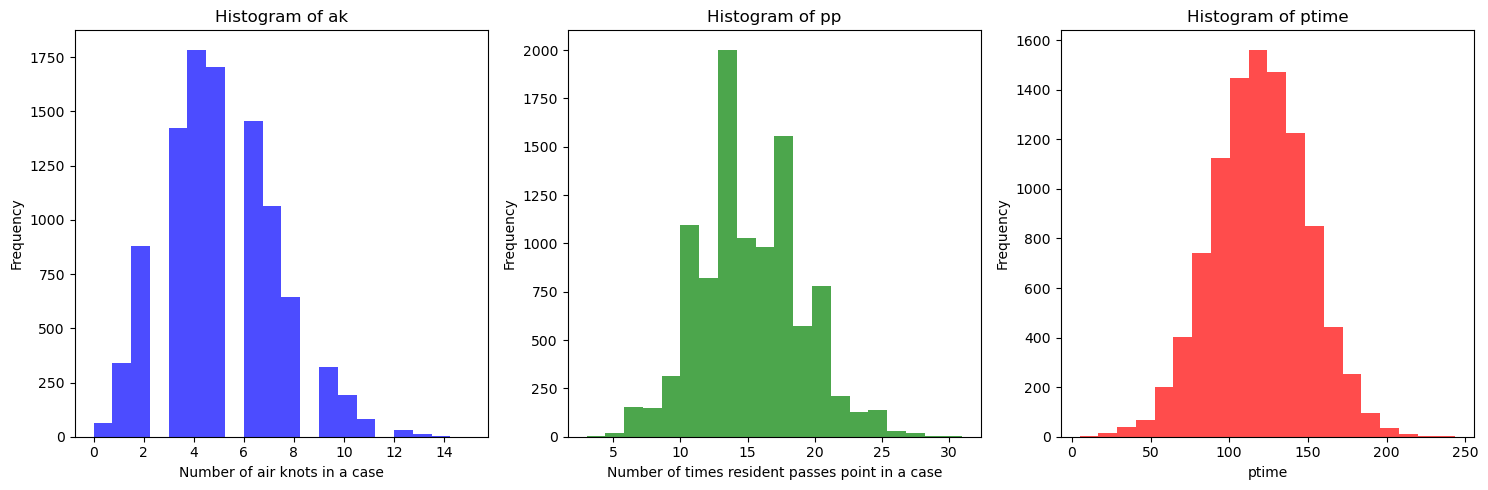

In [26]:
from scipy.stats import poisson, norm

# Number of samples
n_samples = 10000

# Air knot variable, ak
lambda_ak = 5
ak_transformed = poisson.ppf(U_ak, lambda_ak)

# Passes point variable, pp
lambda_pp = 15
U_pp = np.random.rand(n_samples)
pp_transformed = poisson.ppf(U_pp, lambda_pp)

# Practice time, ptime
mean_ptime, std_ptime = 120, 30
U_ptime = np.random.rand(n_samples)
ptime_transformed = norm.ppf(U_ptime, mean_ptime, std_ptime)

# Visualize
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(ak_transformed, bins=20, color='blue', alpha=0.7)
plt.title('Histogram of ak')
plt.xlabel('Number of air knots in a case')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(pp_transformed, bins=20, color='green', alpha=0.7)
plt.title('Histogram of pp')
plt.xlabel('Number of times resident passes point in a case')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.hist(ptime_transformed, bins=20, color='red', alpha=0.7)
plt.title('Histogram of ptime')
plt.xlabel('ptime')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


## Question 1e (10 points)

Replicate the final plot showcasing the correlations between the variables.


cor(ak, pp): -0.003975698475818381
cor(ak, ptime): -0.005455468224221836
cor(pp, ptime): 0.0009771495068521862
cor(gs, ak): -0.02551593109745832
cor(gs, pp): 0.0057588979733236125
cor(gs, ptime): 0.010662786959874136


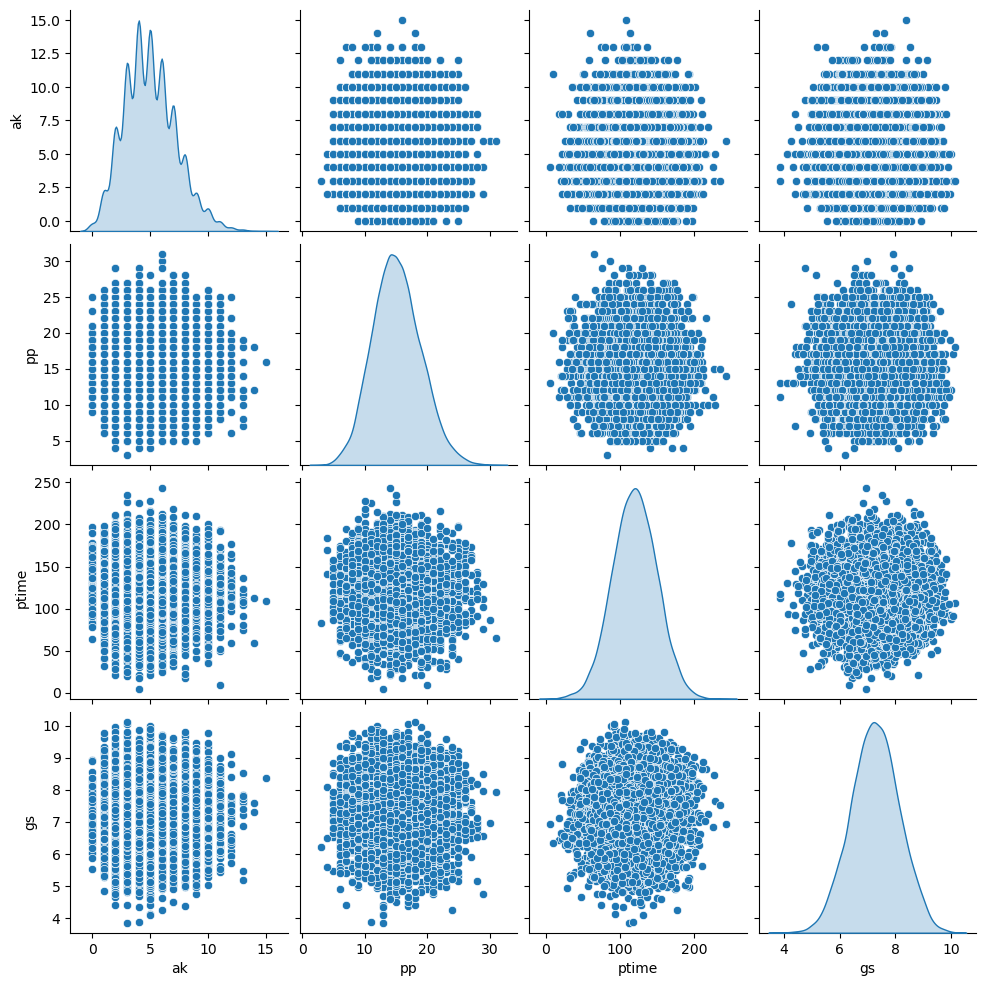

In [27]:
import pandas as pd
import seaborn as sns

# Create a DataFrame
df = pd.DataFrame({
    "ak": ak_transformed,
    "pp": pp_transformed,
    "ptime": ptime_transformed,
    "gs": gs
})

# Calculate and print the correlations
print("cor(ak, pp):", np.corrcoef(df["ak"], df["pp"])[0, 1])
print("cor(ak, ptime):", np.corrcoef(df["ak"], df["ptime"])[0, 1])
print("cor(pp, ptime):", np.corrcoef(df["pp"], df["ptime"])[0, 1])
print("cor(gs, ak):", np.corrcoef(df["gs"], df["ak"])[0, 1])
print("cor(gs, pp):", np.corrcoef(df["gs"], df["pp"])[0, 1])
print("cor(gs, ptime):", np.corrcoef(df["gs"], df["ptime"])[0, 1])

# Visualize correlations
sns.pairplot(df, diag_kind='kde')
plt.show()


## Problem 2 (20 points)

You now pretend that the $n=4$ dimensional data you generated in Problem 1 arrive sequentially one at a time (the co-called **online** learning setting). Introduce the index $i$ to represent the ith arriving data sample $\mathbf x_i$. 

1. Write the expression of the *sample* correlation matrix (5 points)
2. Write the expression of the sample correlation matrix that can be estimated recursively and plot the elements of the sample correlation matrix from $i=1$ to $i=100$ (15 points)

### 1. Sample Correlation Matrix

The sample correlation coefficient between feature $ j $ and feature $ k $ for $ i $ samples is given by:
$ r_{jk} = \frac{\sum_{i=1}^{N} (x_{ji} - \bar{x}_j)(x_{ki} - \bar{x}_k)}{\sqrt{\sum_{i=1}^{N} (x_{ji} - \bar{x}_j)^2 \sum_{i=1}^{N} (x_{ki} - \bar{x}_k)^2}} \ $

The sample correlation matrix $ \mathbf{R} $ for $ i $ samples is:
$ \mathbf{R} = 
\begin{bmatrix}
r_{11} & r_{12} & r_{13} & r_{14} \\
r_{12} & r_{22} & r_{23} & r_{24} \\
r_{13} & r_{23} & r_{33} & r_{34} \\
r_{14} & r_{24} & r_{34} & r_{44}
\end{bmatrix}
$

### 2. Recursive Estimation 

For each arriving data sample $ \mathbf{x}_i $:

- Update mean:
$ \bar{x}_j^{(i)} = \bar{x}_j^{(i-1)} + \frac{x_{ji} - \bar{x}_j^{(i-1)}}{i} $

- Update the second moments:
$ S_{jk}^{(i)} = S_{jk}^{(i-1)} + (x_{ji} - \bar{x}_j^{(i-1)})(x_{ki} - \bar{x}_k^{(i-1)}) $

- Update the sample correlation:
$ r_{jk}^{(i)} = \frac{S_{jk}^{(i)}}{\sqrt{S_{jj}^{(i)}S_{kk}^{(i)}}} $